In [558]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor


In [559]:
gp = pd.read_csv("Global Power Plant Database.csv")
gp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [560]:
gp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [561]:
gp.info

<bound method DataFrame.info of     country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Sola

In [562]:
gp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [563]:
gp.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [564]:
len(gp.columns)

27

In [565]:
gp.shape

(907, 27)

In [566]:
required_columns = [
    'country_long',
    'name',
    'capacity_mw',
    'primary_fuel',
    'other_fuel1',
    'other_fuel2',
    'other_fuel3',
    'commissioning_year',
    'year_of_capacity_data',
    'generation_gwh_2014',
    'generation_gwh_2015',
    'generation_gwh_2016',
    'generation_gwh_2017',
    'generation_gwh_2018',
]

required_columns

['country_long',
 'name',
 'capacity_mw',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [567]:
gp = gp[required_columns].copy()
gp.columns

Index(['country_long', 'name', 'capacity_mw', 'primary_fuel', 'other_fuel1',
       'other_fuel2', 'other_fuel3', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [568]:
gp.isnull().sum()

country_long               0
name                       0
capacity_mw                0
primary_fuel               0
other_fuel1              709
other_fuel2              906
other_fuel3              907
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

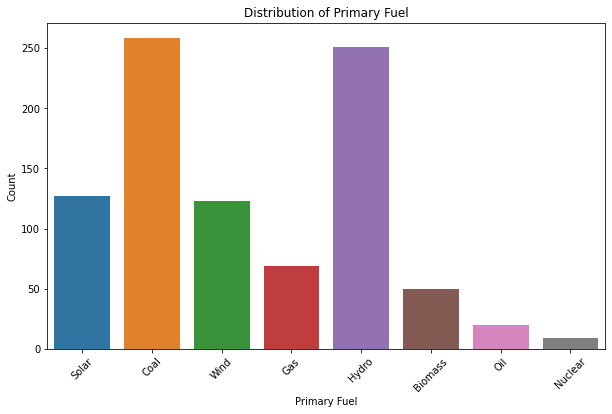

In [569]:
plt.figure(figsize=(10, 6))
sns.countplot(data=gp, x='primary_fuel')
plt.title("Distribution of Primary Fuel")
plt.xlabel("Primary Fuel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [570]:
gp['commissioning_year'].fillna(gp['commissioning_year'].median(), inplace=True)
gp['year_of_capacity_data'].fillna(gp['year_of_capacity_data'].median(), inplace=True)
gp['generation_gwh_2014'].fillna(gp['generation_gwh_2014'].median(), inplace=True)
gp['generation_gwh_2015'].fillna(gp['generation_gwh_2015'].median(), inplace=True)
gp['generation_gwh_2016'].fillna(gp['generation_gwh_2016'].median(), inplace=True)
gp['generation_gwh_2017'].fillna(gp['generation_gwh_2017'].median(), inplace=True)
gp['generation_gwh_2018'].fillna(gp['generation_gwh_2018'].median(), inplace=True)

In [571]:
gp['commissioning_year'] = gp['commissioning_year'].astype(int)
gp['commissioning_decade'] = (gp['commissioning_year'] // 10) * 10
gp['generation_gwh_2014'] = round (gp['generation_gwh_2014'],2)
gp['generation_gwh_2015'] = round (gp['generation_gwh_2015'],2)
gp['generation_gwh_2014'] = round (gp['generation_gwh_2016'],2)
gp['generation_gwh_2014'] = round (gp['generation_gwh_2017'],2)
gp['generation_gwh_2014'] = round (gp['generation_gwh_2018'],2)
gp['capacity_mw'] = round(gp['capacity_mw'])  

In [572]:
generation_cols = ['generation_gwh_2014', 'generation_gwh_2015',
                   'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
                   ]
gp['average_generation_gwh'] = gp[generation_cols].mean(axis=1)
gp['average_generation_gwh'] = round(gp['average_generation_gwh'],2)
gp['average_generation_gwh']

0       753.93
1       753.93
2       753.93
3       729.20
4      6420.59
        ...   
902     494.60
903     753.93
904     753.93
905     753.93
906     753.93
Name: average_generation_gwh, Length: 907, dtype: float64

In [573]:
primary_fuel_counts = gp['primary_fuel'].value_counts()
primary_fuel_counts

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [574]:
label_encoder = LabelEncoder()
gp['country_long'] = label_encoder.fit_transform(gp['country_long'])
gp['name'] = label_encoder.fit_transform(gp['name'])
gp['other_fuel1'] = label_encoder.fit_transform(gp['other_fuel1'])
gp['other_fuel2'] = label_encoder.fit_transform(gp['other_fuel2'])
gp['other_fuel3'] = label_encoder.fit_transform(gp['other_fuel3'])
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            907 non-null    int32  
 1   name                    907 non-null    int32  
 2   capacity_mw             907 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             907 non-null    int32  
 5   other_fuel2             907 non-null    int32  
 6   other_fuel3             907 non-null    int64  
 7   commissioning_year      907 non-null    int32  
 8   year_of_capacity_data   907 non-null    float64
 9   generation_gwh_2014     907 non-null    float64
 10  generation_gwh_2015     907 non-null    float64
 11  generation_gwh_2016     907 non-null    float64
 12  generation_gwh_2017     907 non-null    float64
 13  generation_gwh_2018     907 non-null    float64
 14  commissioning_decade    907 non-null    in

In [575]:
label_encoder = LabelEncoder()
gp['primary_fuel'] = label_encoder.fit_transform(gp['primary_fuel'])
print(gp['primary_fuel'].dtypes,gp['capacity_mw'].dtypes)

int32 float64


In [576]:
x = gp.drop(['primary_fuel', 'capacity_mw'], axis=1)
y_fuel = gp['primary_fuel']
y_capacity = gp['capacity_mw']

In [577]:
x_fuel_train, x_fuel_test, y_fuel_train, y_fuel_test = train_test_split(x, y_fuel, test_size=0.2, random_state=42)

In [578]:
x_capacity_train, x_capacity_test, y_capacity_train, y_capacity_test = train_test_split(x, y_capacity, test_size=0.2, random_state=42)

In [579]:
passage = Pipeline([('scaler', StandardScaler()),('model', None)])

In [580]:
parameters = {'model': {'Support Vector Machine': (SVC(), {'model__C': [1, 10, 100],'model__gamma': [0.1, 0.01, 0.001]}),
'Logistic Regression': (LogisticRegression(), {'model__C': [0.1, 1, 10]}),
'Random Forest': (RandomForestClassifier(), {'model__n_estimators': [50, 100, 200],'model__max_depth': [None, 5, 10]})
}}

In [581]:
print("Primary Fuel Prediction:")
for model_name, (model, params) in parameters['model'].items():
    passage.set_params(model=model)
    grid_search_fuel = GridSearchCV(passage, params, cv=5, scoring='accuracy')
    grid_search_fuel.fit(x_fuel_train, y_fuel_train)
    best_model = grid_search_fuel.best_estimator_
    y_fuel_pred = best_model.predict(x_fuel_test)
    accuracy = accuracy_score(y_fuel_test, y_fuel_pred)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search_fuel.best_params_}")
    print(f"Accuracy: {accuracy:.2f}\n")

Primary Fuel Prediction:
Model: Support Vector Machine
Best Parameters: {'model__C': 100, 'model__gamma': 0.01}
Accuracy: 0.57

Model: Logistic Regression
Best Parameters: {'model__C': 10}
Accuracy: 0.55

Model: Random Forest
Best Parameters: {'model__max_depth': None, 'model__n_estimators': 200}
Accuracy: 0.74



In [582]:
print("Capacity Prediction:")
for model_name, (model, params) in parameters['model'].items():
    passage.set_params(model=model)
    grid_search_capacity = GridSearchCV(passage, params, cv=5, scoring='neg_mean_squared_error')
    grid_search_capacity.fit(x_capacity_train, y_capacity_train)
    best_model = grid_search_capacity.best_estimator_
    y_capacity_pred = best_model.predict(x_capacity_test)
    mse = mean_squared_error(y_capacity_test, y_capacity_pred)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search_capacity.best_params_}")
    print(f"Mean Squared Error: {mse:.2f}\n")

Capacity Prediction:
Model: Support Vector Machine
Best Parameters: {'model__C': 100, 'model__gamma': 0.01}
Mean Squared Error: 70028.69

Model: Logistic Regression
Best Parameters: {'model__C': 1}
Mean Squared Error: 97285.64

Model: Random Forest
Best Parameters: {'model__max_depth': 5, 'model__n_estimators': 200}
Mean Squared Error: 73795.14



In [583]:
best_model_fuel = grid_search_fuel.best_estimator_
y_fuel_pred = best_model_fuel.predict(x_fuel_test)
accuracy_fuel = accuracy_score(y_fuel_test, y_fuel_pred)
print("Best Model for Primary Fuel Prediction:")
print(best_model_fuel)
print(f"Accuracy: {accuracy_fuel:.2f}\n")

Best Model for Primary Fuel Prediction:
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(n_estimators=200))])
Accuracy: 0.74



In [584]:
best_model_capacity = grid_search_capacity.best_estimator_
y_capacity_pred = best_model_capacity.predict(x_capacity_test)
mse_capacity = mean_squared_error(y_capacity_test, y_capacity_pred)
print("Best Model for Capacity Prediction:")
print(best_model_capacity)
print(f"Mean Squared Error: {mse_capacity:.2f}\n")

Best Model for Capacity Prediction:
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=5, n_estimators=200))])
Mean Squared Error: 73795.14

